# Decision Tree - Classification

## Import Libraries

In [24]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

%matplotlib inline

# 1. Data Gathering 

In [2]:
df = pd.read_csv('diabetes.csv')
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
x = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [5]:
x

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[768 rows x 8 columns]

In [6]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [7]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# Train Test Split

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=1,stratify=y)

In [13]:
y_train.value_counts()

0    400
1    214
Name: Outcome, dtype: int64

# Model Training

In [14]:
dt_model = DecisionTreeClassifier(criterion = 'gini')
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

# Testing Data Accuracy

In [16]:
y_pred_test = dt_model.predict(x_test)


testing_accuracy = accuracy_score(y_test,y_pred_test)
print('Testing data accuracy is :', testing_accuracy)
print()
clf_report = classification_report(y_test,y_pred_test)
print('Classification report is\n :',clf_report)
print()
confusion_matrix(y_test,y_pred_test)

Testing data accuracy is : 0.7012987012987013

Classification report is
 :               precision    recall  f1-score   support

           0       0.75      0.80      0.78       100
           1       0.58      0.52      0.55        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154




array([[80, 20],
       [26, 28]], dtype=int64)

In [17]:
y_test[0:5]

488    0
413    0
112    0
222    0
711    0
Name: Outcome, dtype: int64

In [18]:
y_pred_test[0:5]

array([0, 0, 0, 1, 1], dtype=int64)

# Training Data Accuracy

In [19]:
y_pred_train = dt_model.predict(x_train)


training_accuracy = accuracy_score(y_train,y_pred_train)
print('Train data accuracy is :', training_accuracy)
print()
clf_report = classification_report(y_train,y_pred_train)
print('Classification report is\n :',clf_report)
print()
confusion_matrix(y_train,y_pred_train)

Train data accuracy is : 1.0

Classification report is
 :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       214

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614




array([[400,   0],
       [  0, 214]], dtype=int64)

In [25]:
plt.figure(figsize = (200,100))
tree = plot_tree(decision_tree= dt_model, class_names=['0','1'],feature_names=df.columns, filled=True)
plt.savefig('DT_Overfitting.png')

# Hyperparameter Tuning

# 1. GridSearchCV

In [26]:
hyperparameters = {'criterion' : ['gini','entropy'],
                   'max_depth' : np.arange(2,10),
                   'min_samples_split' : np.arange(2,15),
                   'min_samples_leaf' : np.arange(1,15)}

dt_model = DecisionTreeClassifier()
gscv_dt_model = GridSearchCV(dt_model,hyperparameters,cv = 5)
gscv_dt_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [27]:
gscv_dt_model.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 6,
 'min_samples_split': 5}

In [28]:
best_model = DecisionTreeClassifier(max_depth = 6,
                                   min_samples_leaf = 6,
                                   min_samples_split = 5)
best_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, min_samples_split=5)

# Testing Data Accuracy

In [29]:
y_pred_test = best_model.predict(x_test)


testing_accuracy = accuracy_score(y_test,y_pred_test)
print('Testing data accuracy is :', testing_accuracy)
print()
clf_report = classification_report(y_test,y_pred_test)
print('Classification report is\n :',clf_report)
print()
confusion_matrix(y_test,y_pred_test)

Testing data accuracy is : 0.7597402597402597

Classification report is
 :               precision    recall  f1-score   support

           0       0.79      0.86      0.82       100
           1       0.69      0.57      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.72       154
weighted avg       0.75      0.76      0.75       154




array([[86, 14],
       [23, 31]], dtype=int64)

# Training Data Accuracy

In [30]:
y_pred_train = best_model.predict(x_train)


training_accuracy = accuracy_score(y_train,y_pred_train)
print('Train data accuracy is :', training_accuracy)
print()
clf_report = classification_report(y_train,y_pred_train)
print('Classification report is\n :',clf_report)
print()
confusion_matrix(y_train,y_pred_train)

Train data accuracy is : 0.8387622149837134

Classification report is
 :               precision    recall  f1-score   support

           0       0.87      0.89      0.88       400
           1       0.78      0.74      0.76       214

    accuracy                           0.84       614
   macro avg       0.82      0.82      0.82       614
weighted avg       0.84      0.84      0.84       614




array([[356,  44],
       [ 55, 159]], dtype=int64)

In [31]:
plt.figure(figsize = (200,100))
tree = plot_tree(decision_tree= best_model, class_names=['0','1'],feature_names=df.columns,
                 filled=True)
plt.savefig('DT_GRIDSEARCHCV.png')

# 2. RandomizedSearchCV

In [32]:
hyperparameters = {'criterion' : ['gini','entropy'],
                   'max_depth' : np.arange(2,10),
                   'min_samples_split' : np.arange(2,15),
                   'min_samples_leaf' : np.arange(1,15)}

dt_model = DecisionTreeClassifier()
rscv_dt_model = RandomizedSearchCV(dt_model,hyperparameters,cv = 5)
rscv_dt_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [33]:
rscv_dt_model.best_params_

{'min_samples_split': 7,
 'min_samples_leaf': 3,
 'max_depth': 2,
 'criterion': 'gini'}

In [34]:
best_model = DecisionTreeClassifier(max_depth = 2,
                                   min_samples_leaf = 3,
                                   min_samples_split = 7)
best_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=3, min_samples_split=7)

# Testing Data Accuracy

In [35]:
y_pred_test = best_model.predict(x_test)


testing_accuracy = accuracy_score(y_test,y_pred_test)
print('Testing data accuracy is :', testing_accuracy)
print()
clf_report = classification_report(y_test,y_pred_test)
print('Classification report is\n :',clf_report)
print()
confusion_matrix(y_test,y_pred_test)

Testing data accuracy is : 0.7532467532467533

Classification report is
 :               precision    recall  f1-score   support

           0       0.77      0.89      0.82       100
           1       0.71      0.50      0.59        54

    accuracy                           0.75       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154




array([[89, 11],
       [27, 27]], dtype=int64)

# Training Data Accuracy

In [36]:
y_pred_train = best_model.predict(x_train)


training_accuracy = accuracy_score(y_train,y_pred_train)
print('Train data accuracy is :', training_accuracy)
print()
clf_report = classification_report(y_train,y_pred_train)
print('Classification report is\n :',clf_report)
print()
confusion_matrix(y_train,y_pred_train)

Train data accuracy is : 0.7768729641693811

Classification report is
 :               precision    recall  f1-score   support

           0       0.80      0.89      0.84       400
           1       0.73      0.57      0.64       214

    accuracy                           0.78       614
   macro avg       0.76      0.73      0.74       614
weighted avg       0.77      0.78      0.77       614




array([[354,  46],
       [ 91, 123]], dtype=int64)

In [37]:
plt.figure(figsize = (200,100))
tree = plot_tree(decision_tree= best_model, class_names=['0','1'],feature_names=df.columns,
                 filled=True)
plt.savefig('DT_RANDOMIZEDSEARCHCV.png')

# Pruning

In [38]:
dt_model = DecisionTreeClassifier(ccp_alpha=0.0)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [41]:
values = dt_model.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas = values['ccp_alphas']
ccp_alphas

array([0.        , 0.00135722, 0.00142508, 0.0014477 , 0.0014477 ,
       0.0014806 , 0.00149294, 0.00154723, 0.00157438, 0.00160409,
       0.00161474, 0.00175434, 0.00193027, 0.00217155, 0.00217155,
       0.00226203, 0.00230205, 0.00231632, 0.00238505, 0.00243823,
       0.002443  , 0.002443  , 0.002443  , 0.00252652, 0.00260586,
       0.00260586, 0.0026152 , 0.00263506, 0.00267249, 0.0027115 ,
       0.00281315, 0.00283775, 0.00284001, 0.00285016, 0.0029316 ,
       0.0029316 , 0.0029316 , 0.00300677, 0.00315862, 0.00327295,
       0.00339305, 0.00346049, 0.0037484 , 0.00384586, 0.00391397,
       0.00427404, 0.00428243, 0.00463828, 0.00481021, 0.00500358,
       0.00500745, 0.00661636, 0.00778397, 0.00821741, 0.01140636,
       0.01858956, 0.02517158, 0.0871409 ])

In [42]:
train_accuracy = []
test_accuracy = []
for ccp_alpha in ccp_alphas:
    dt_model = DecisionTreeClassifier(ccp_alpha= ccp_alpha, random_state=10)
    dt_model.fit(x_train,y_train)
    train_accuracy.append(dt_model.score(x_train,y_train))
    test_accuracy.append(dt_model.score(x_test,y_test))

In [46]:
max(test_accuracy)

0.7662337662337663

In [47]:
test_accuracy.index(max(test_accuracy))

46

In [48]:
train_accuracy[46]

0.8469055374592834

In [49]:
ccp_alphas[46]

0.004282429584211534

In [50]:
dt_model = DecisionTreeClassifier(ccp_alpha= 0.004282429584211534)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.004282429584211534)

# Testing Data Accuracy

In [51]:
y_pred_test = dt_model.predict(x_test)


testing_accuracy = accuracy_score(y_test,y_pred_test)
print('Testing data accuracy is :', testing_accuracy)
print()
clf_report = classification_report(y_test,y_pred_test)
print('Classification report is\n :',clf_report)
print()
confusion_matrix(y_test,y_pred_test)

Testing data accuracy is : 0.7662337662337663

Classification report is
 :               precision    recall  f1-score   support

           0       0.80      0.85      0.83       100
           1       0.69      0.61      0.65        54

    accuracy                           0.77       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154




array([[85, 15],
       [21, 33]], dtype=int64)

# Training Data Accuracy

In [52]:
y_pred_train = dt_model.predict(x_train)


training_accuracy = accuracy_score(y_train,y_pred_train)
print('Train data accuracy is :', training_accuracy)
print()
clf_report = classification_report(y_train,y_pred_train)
print('Classification report is\n :',clf_report)
print()
confusion_matrix(y_train,y_pred_train)

Train data accuracy is : 0.8469055374592834

Classification report is
 :               precision    recall  f1-score   support

           0       0.88      0.89      0.88       400
           1       0.78      0.78      0.78       214

    accuracy                           0.85       614
   macro avg       0.83      0.83      0.83       614
weighted avg       0.85      0.85      0.85       614




array([[354,  46],
       [ 48, 166]], dtype=int64)

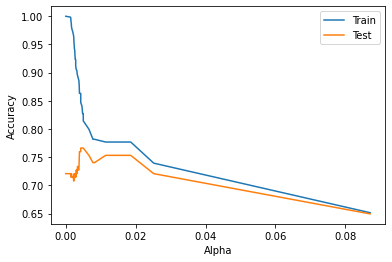

In [59]:
ax = plt.subplot()
ax.plot(ccp_alphas,train_accuracy, label = 'Train')
ax.plot(ccp_alphas,test_accuracy, label = 'Test')
ax.set_xlabel('Alpha')
ax.set_ylabel('Accuracy')
ax.legend()

In [60]:
plt.figure(figsize = (200,100))
tree = plot_tree(decision_tree= dt_model, class_names=['0','1'],feature_names=df.columns,
                 filled=True)
plt.savefig('DT_CCP_ALPHA.png')